# Манжос Егор Валерьевич

#### 1. Вопросы:

1) ~7-8.... на перспективу 10 :)

2) ~6-8.... знания на уровне ВПР или VLOOKUP, есть рабочий опыт с Excel

#### 2. Задачи на логику:

1) 4$

2) 18 дней

3) 35 баннеров

4) Джон и Кейт

5) 88 баллов, должен получить стажер за 5-ый модуль. Если брать случайные числа которые имеют среднее значение 78

6) На 39 минут быстрее

#### 3.Техническое задание

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [4]:
df.query("status == 'Июнь 2021'")

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaN,NaN


In [5]:
df.status.unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

#### Данные довольно не удобные, имееються пропуски и NaN в строчках первым делом избавлюсь от месяцев в status

In [6]:
df['month'] = df['status'] \
    .where(df['status'] \
           .str.contains('Май 2021|Июнь 2021|Июль 2021|Август 2021|Сентябрь 2021|Октябрь 2021'))

df['month'].ffill(inplace=True)

In [7]:
df = df[~df['status'] \
    .str.contains('Май 2021|Июнь 2021|Июль 2021|Август 2021|Сентябрь 2021|Октябрь 2021')]

In [8]:
df = df.fillna(0)
#df['Unnamed: 5'].unique()
df = df.drop('Unnamed: 5', axis=1)
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021


In [9]:
df.isna().sum()

client_id         0
sum               0
status            0
sale              0
new/current       0
document          0
receiving_date    0
month             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 1 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          724 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   document        724 non-null    object 
 6   receiving_date  724 non-null    object 
 7   month           724 non-null    object 
dtypes: float64(2), object(6)
memory usage: 50.9+ KB


#### Вопросы:

In [11]:
#1 
# По поводу query 'ПРОСРОЧЕНО' буду считать что данное обозначение не будет
# показаваться в общих доходах и тд, так же буду применять данный метод при
# подсчете выручки во всех заданиях
df \
    .query("status != 'ПРОСРОЧЕНО' and month == 'Июль 2021'") \
    .agg({'sum': 'sum'})
    

sum    859896.47
dtype: float64

In [12]:
# делаю month более удобными для задания номер 2

In [13]:
df[['Month', 'Year']] = df['month'].str.split(expand=True)

months_map = {'Май': 5,
              'Июнь': 6,
              'Июль': 7,
              'Август': 8,
              'Сентябрь': 9,
              'Октябрь': 10}

df['Month'] = df['Month'].map(months_map)

df['date'] = pd.to_datetime(df['Year'] + '-' + df['Month'].astype(str),
                            format='%Y-%m')

df = df.drop(['month', 'Year'], axis=1)

In [14]:
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,Month,date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,5,2021-05-01
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,5,2021-05-01
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,5,2021-05-01
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,5,2021-05-01
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,5,2021-05-01


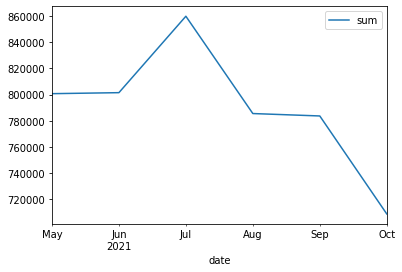

In [15]:
#2
df_plot = df \
    .query("status != 'ПРОСРОЧЕНО'") \
    .groupby('date', as_index=False) \
    .agg({'sum': 'sum'})
df_plot.plot(x='date', y='sum')

In [40]:
#3
df \
    .query("status != 'ПРОСРОЧЕНО' and \
           date == '2021-09-01'") \
    .groupby('sale', as_index=False) \
    .agg({'sum': 'sum'}) \
    .sort_values('sum', ascending=False)

,sale,sum
6,Смирнов,221525.70
0,Андреев,130983.80
5,Петрова,119724.86
2,Иванов,94770.60
3,Кузнецова,72228.40
8,Филимонова,59514.47
1,Васильев,45416.75
7,Соколов,35183.50
4,Михайлов,4268.70


In [17]:
#4
df \
    .query("date == '2021-10-01'") \
    .groupby('new/current', as_index=False) \
    .agg({'client_id': 'count'}) \
    .rename(columns={'client_id': 'count'})

,new/current,count
0,новая,36
1,текущая,99


In [18]:
#5
df \
    .query("date == '2021-07-01'") \
    .groupby('document', as_index=False) \
    .agg({'client_id': 'count'}) \
    .rename(columns={'client_id': 'count'})
# В данном случае у нас наконец-то отобразился 0, но из за того что приминял
# данное решение сам, то буду его считать как ошибку при заполнении документа

,document,count
0,0,1
1,НЕТ,3
2,оригинал,106


### Задание:

In [19]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce')

In [20]:
# df.shape[0]

In [21]:
# df = df.dropna()

In [22]:
# df.shape[0]

In [23]:
def calculate_bonus(amount, status, receiving_date, date):
    if receiving_date.month == date.month:
        if status == 'ОПЛАЧЕНО':
            return amount * 0.07
        else:
            return 0
    else:
        if amount > 10000 and status != 'ПРОСРОЧЕНО':
            return amount * 0.05
        else:
            return amount * 0.03


In [24]:
df['bonus'] = df.apply(lambda row: calculate_bonus(row['sum'], row['status']
                                                   , row['receiving_date'],
                                                   row['date']), axis=1)


In [25]:
df['Month_receiving'] = df['receiving_date'].dt.month

In [26]:
df['deal_type'] = np.where(df['Month_receiving'] == df['Month'], 'текущая', 'остаточная')

In [41]:
df \
    .query("date <= '2021-07-01' and \
           deal_type == 'остаточная'") \
    .groupby('sale', as_index=False) \
    .agg({'bonus': 'sum'})

# Выявили так же ошибку в данных в виде незаполненной строки

,sale,bonus
0,-,584.6850
1,Андреев,11603.9505
2,Васильев,3040.9270
3,Иванов,14789.8840
4,Кузнецова,10964.5705
5,Петрова,22487.1528
6,Селиванов,5374.8630
7,Смирнов,17957.5740
8,Соколов,781.3050
9,Филимонова,6771.9559


## По итогу получаем результирующую таблицу